## Data Visualization and Analysis

In today's lecture, we will learn how to read and visualize data. Data is often provided as *.txt* or *.csv* files that can be imported into Python for visualization and analysis. We will learn how to use two of the most important libraries for data science : 
- Matplotlib (https://matplotlib.org/)
- Pandas (https://pandas.pydata.org/docs/)

**Matplotlib** is a general plotting library while **Pandas** serves to organize and manipulate data. These libraries are large and are one of the main reasons why Python is the preferred language for data science. We will only cover the basic principles of these libraries, please refer to the documentation and StackOverflow for additional information. 

Today we will use data obtained from a experiment that used motion tracking and force plates. Twenty eight volunteers were recorded using motion tracking and force plates while they ran at different speeds in a treadmill (2.5 m/s, 3.5 m/s, and 4.5 m/s). 

Details about the experiment and data can be found here: 
```
Fukuchi, Reginaldo K., Claudiane A. Fukuchi, and Marcos Duarte. "A public dataset of running biomechanics and the effects of running speed on lower extremity kinematics and kinetics." PeerJ 5 (2017): e3298.
```

<div style="text-align: center;">
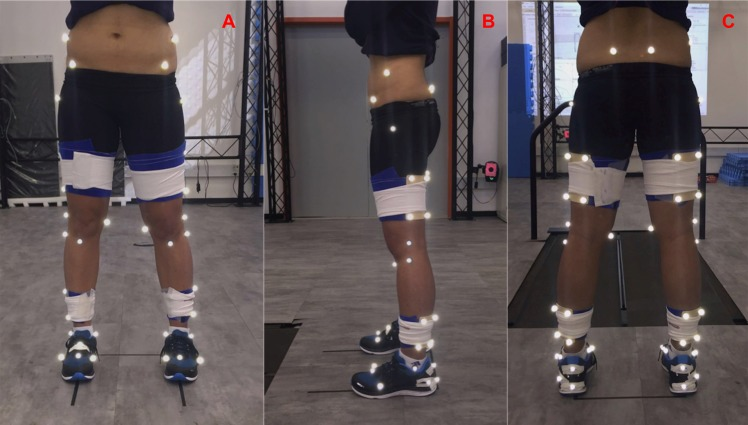
</div>


Data for each subject is organized in a table using the following structure: 

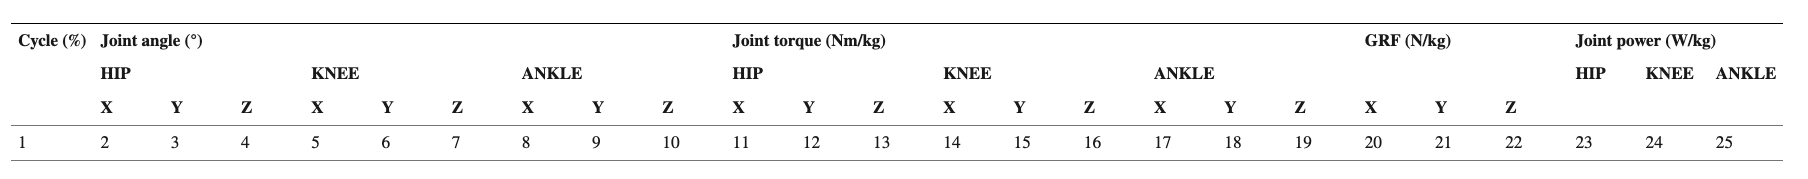

We will use pandas and matplotlib to upload, visualize, and analyze the data. 

In [117]:
#importing libraries 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


#I will update the font size of the plot ticks. It isa personal preference
font = {'family' : 'Arial',
        'size'   : 22}

matplotlib.rc('font', **font)

### Reading data -- 

Pandas includes multiple methods to load data into Python and to save your data so that it can be used by other programs

<div style="text-align: center;">
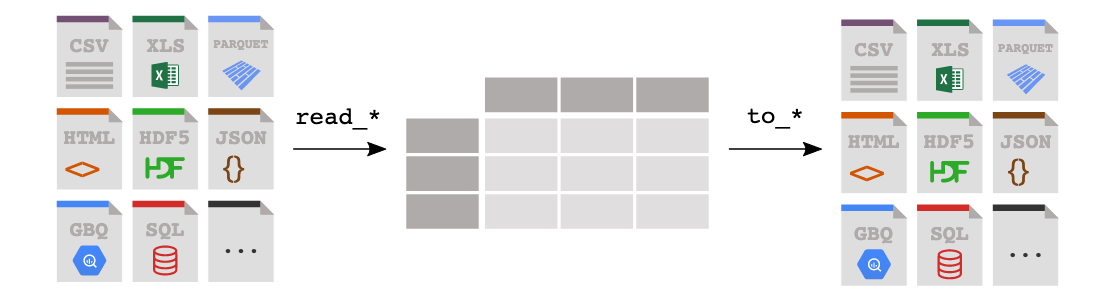
</div>

one of the most versatile options is ```read_csv()```, which can read different formats as long as the data is properly arranged. 

Data will be uploaded into a special object called *DataFrame*. This object allow us to visualize and manipulate the data.

```
Note: To read excel files (.xls or xlsx), you need to install an additional library:

pip install openpyxl
```


In [28]:
# we can load the data describing our dataset. All data is located in the folder './gaitData/...'
# in this case, we will read a .cvs file
data=pd.read_csv('./gaitData/RBDSinfo.csv')
type(data)

pandas.core.frame.DataFrame

In [30]:
data.head()
#pandas will assign a new column with an index (unless you specify the index), and will assume that the firs row corresponds to the headers

,SubjectID,Age,Height,Weigth,BMI,Gender,Injury,InjuryLocation
0,1,22,181.0,62.00,18.92,M,Yes,Right knee
1,2,38,183.0,80.00,23.89,M,Yes,Ankle bileteral
2,3,34,177.0,65.40,20.88,M,Yes,Left anterior tibia
3,4,33,168.0,57.05,20.21,M,No,NaN
4,5,32,169.0,60.00,21.01,M,Yes,Right knee


In [33]:
data = pd.read_csv('./gaitData/RBDSinfo.csv', index_col=0)
data.head()

,Age,Height,Weigth,BMI,Gender,Injury,InjuryLocation
SubjectID,,,,,,,
1,22,181.0,62.00,18.92,M,Yes,Right knee
2,38,183.0,80.00,23.89,M,Yes,Ankle bileteral
3,34,177.0,65.40,20.88,M,Yes,Left anterior tibia
4,33,168.0,57.05,20.21,M,No,NaN
5,32,169.0,60.00,21.01,M,Yes,Right knee


In [35]:
data=pd.read_csv('./gaitData/RBDSinfo.csv')
print(f'Number of subjects {len(data)}')

Number of subjects 28


In [38]:
#pandas can provide a brief summary of your data 
data.describe()

,SubjectID,Age,Height,Weigth,BMI
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,14.500000,34.750000,175.960714,69.637500,22.445000
std,8.225975,6.686775,6.802578,7.741514,1.623698
min,1.000000,22.000000,162.700000,56.850000,18.920000
25%,7.750000,30.750000,169.000000,64.312500,21.237500
50%,14.500000,34.500000,177.400000,69.950000,22.570000
75%,21.250000,38.250000,181.825000,76.037500,23.525000
max,28.000000,51.000000,187.200000,82.150000,25.860000


In [50]:
#you can access the columns by their names, you can get either a list or a numpy array. 
age = data['Age'].values
print(type(age), age)

<class 'numpy.ndarray'> [22 38 34 33 32 39 31 36 51 25 30 45 40 35 31 30 37 35 39 26 48 32 27 32
 38 37 29 41]


In [51]:
age = data['Age'].values.tolist()
print(type(age), age)

<class 'list'> [22, 38, 34, 33, 32, 39, 31, 36, 51, 25, 30, 45, 40, 35, 31, 30, 37, 35, 39, 26, 48, 32, 27, 32, 38, 37, 29, 41]


In [99]:
#you can also modify the DataFrame using index
data['Age'][0]= 40
age = data['Age'].values
print(type(age), age)

<class 'numpy.ndarray'> [40 38 34 33 32 39 31 36 51 25 30 45 40 35 31 30 37 35 39 26 48 32 27 32
 38 37 29 41]


<ipython-input-99-93dcfa972aca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][0]= 40


In [100]:
data=pd.read_csv('./gaitData/RBDSinfo.csv')

In [60]:
#pandas also has powerfull filtering options
dataHealthy =  data[data['Injury']== 'No'].reset_index()
dataHealthy

,index,SubjectID,Age,Height,Weigth,BMI,Gender,Injury,InjuryLocation
0,3,4,33,168.0,57.05,20.21,M,No,NaN
1,5,6,39,177.8,78.30,24.77,M,No,NaN
2,7,8,36,180.0,69.00,21.30,M,No,NaN
3,9,10,25,169.0,64.75,22.67,M,No,NaN
4,11,12,45,178.6,75.70,23.73,M,No,NaN
5,12,13,40,165.2,58.20,21.33,M,No,NaN
6,13,14,35,187.2,75.80,21.63,M,No,NaN
7,15,16,30,167.5,72.55,25.86,M,No,NaN
8,16,17,37,183.5,82.15,24.40,M,No,NaN
9,18,19,39,166.1,56.85,20.61,F,No,NaN


In [75]:
#pandas also has powerfull filtering options
dataHealthy =  data[data['Injury']== 'No'].reset_index(drop=True)
dataHealthy

,SubjectID,Age,Height,Weigth,BMI,Gender,Injury,InjuryLocation
0,4,33,168.0,57.05,20.21,M,No,NaN
1,6,39,177.8,78.30,24.77,M,No,NaN
2,8,36,180.0,69.00,21.30,M,No,NaN
3,10,25,169.0,64.75,22.67,M,No,NaN
4,12,45,178.6,75.70,23.73,M,No,NaN
5,13,40,165.2,58.20,21.33,M,No,NaN
6,14,35,187.2,75.80,21.63,M,No,NaN
7,16,30,167.5,72.55,25.86,M,No,NaN
8,17,37,183.5,82.15,24.40,M,No,NaN
9,19,39,166.1,56.85,20.61,F,No,NaN


In [76]:
dataHealthyandYoung =  data[(data['Injury']== 'No') & (data['Age'] <= 30)].reset_index(drop=True)
dataHealthyandYoung

,SubjectID,Age,Height,Weigth,BMI,Gender,Injury,InjuryLocation
0,10,25,169.0,64.75,22.67,M,No,NaN
1,16,30,167.5,72.55,25.86,M,No,NaN
2,20,26,174.5,68.15,22.38,M,No,NaN
3,23,27,181.0,74.00,22.59,M,No,NaN
4,27,29,169.0,67.50,23.63,M,No,NaN


In [88]:
#Exercise
#what if I want data from people with injury, older than 30, and taller than 170 cm

In [91]:
#what if I want data from people with injury in the knee
datakneeInjury =  data[data['InjuryLocation'].str.lower().str.contains('knee', na=False)].reset_index(drop=True)
datakneeInjury

,SubjectID,Age,Height,Weigth,BMI,Gender,Injury,InjuryLocation
0,1,22,181.0,62.0,18.92,M,Yes,Right knee
1,5,32,169.0,60.0,21.01,M,Yes,Right knee


In [101]:
#Excersise 
#what if I want data from people with injury in the left ankle? 


In [104]:
GaitData = pd.read_csv('./gaitData/RBDS001processed.txt')
GaitData.head()

,PercGcycle\tRhipAngX25\tRhipAngY25\tRhipAngZ25\tRkneeAngX25\tRkneeAngY25\tRkneeAngZ25\tRankleAngX25\tRankleAngY25\tRankleAngZ25\tRhipMomX25\tRhipMomY25\tRhipMomZ25\tRkneeMomX25\tRkneeMomY25\tRkneeMomZ25\tRankleMomX25\tRankleMomY25\tRankleMomZ25\tRgrfX25\tRgrfY25\tRgrfZ25\tRhipPow25\tRkneePow25\tRanklePow25\tRhipAngX35\tRhipAngY35\tRhipAngZ35\tRkneeAngX35\tRkneeAngY35\tRkneeAngZ35\tRankleAngX35\tRankleAngY35\tRankleAngZ35\tRhipMomX35\tRhipMomY35\tRhipMomZ35\tRkneeMomX35\tRkneeMomY35\tRkneeMomZ35\tRankleMomX35\tRankleMomY35\tRankleMomZ35\tRgrfX35\tRgrfY35\tRgrfZ35\tRhipPow35\tRkneePow35\tRanklePow35\tRhipAngX45\tRhipAngY45\tRhipAngZ45\tRkneeAngX45\tRkneeAngY45\tRkneeAngZ45\tRankleAngX45\tRankleAngY45\tRankleAngZ45\tRhipMomX45\tRhipMomY45\tRhipMomZ45\tRkneeMomX45\tRkneeMomY45\tRkneeMomZ45\tRankleMomX45\tRankleMomY45\tRankleMomZ45\tRgrfX45\tRgrfY45\tRgrfZ45\tRhipPow45\tRkneePow45\tRanklePow45\tLhipAngX25\tLhipAngY25\tLhipAngZ25\tLkneeAngX25\tLkneeAngY25\tLkneeAngZ25\tLankleAngX25\tLankleAngY25\tLankleAngZ25\tLhipMomX25\tLhipMomY25\tLhipMomZ25\tLkneeMomX25\tLkneeMomY25\tLkneeMomZ25\tLankleMomX25\tLankleMomY25\tLankleMomZ25\tLgrfX25\tLgrfY25\tLgrfZ25\tLhipPow25\tLkneePow25\tLanklePow25\tLhipAngX35\tLhipAngY35\tLhipAngZ35\tLkneeAngX35\tLkneeAngY35\tLkneeAngZ35\tLankleAngX35\tLankleAngY35\tLankleAngZ35\tLhipMomX35\tLhipMomY35\tLhipMomZ35\tLkneeMomX35\tLkneeMomY35\tLkneeMomZ35\tLankleMomX35\tLankleMomY35\tLankleMomZ35\tLgrfX35\tLgrfY35\tLgrfZ35\tLhipPow35\tLkneePow35\tLanklePow35\tLhipAngX45\tLhipAngY45\tLhipAngZ45\tLkneeAngX45\tLkneeAngY45\tLkneeAngZ45\tLankleAngX45\tLankleAngY45\tLankleAngZ45\tLhipMomX45\tLhipMomY45\tLhipMomZ45\tLkneeMomX45\tLkneeMomY45\tLkneeMomZ45\tLankleMomX45\tLankleMomY45\tLankleMomZ45\tLgrfX45\tLgrfY45\tLgrfZ45\tLhipPow45\tLkneePow45\tLanklePow45
0,0\t0.832421\t-1.45233\t34.9272\t0.489699\t-7.1...
1,1\t1.02742\t-0.984369\t34.7158\t0.748503\t-7.1...
2,2\t1.29754\t-0.453284\t34.531\t1.03328\t-7.075...
3,3\t1.65141\t0.0582174\t34.3569\t1.29877\t-6.67...
4,4\t2.0917\t0.452856\t34.1743\t1.47423\t-5.9803...


This is clearly not what we want. In this case, the data uses a different kind of separator 

In [109]:
gaitData = pd.read_csv('./gaitData/RBDS001processed.txt', sep='	')
gaitData.head()

,PercGcycle,RhipAngX25,RhipAngY25,RhipAngZ25,RkneeAngX25,RkneeAngY25,RkneeAngZ25,RankleAngX25,RankleAngY25,RankleAngZ25,...,LkneeMomZ45,LankleMomX45,LankleMomY45,LankleMomZ45,LgrfX45,LgrfY45,LgrfZ45,LhipPow45,LkneePow45,LanklePow45
0,0,0.832421,-1.452330,34.9272,0.489699,-7.14188,13.3967,9.39102,9.95580,-8.48566,...,-0.903513,0.045675,0.004664,0.127170,-0.281726,0.747135,0.206165,3.349560,2.297550,0.141932
1,1,1.027420,-0.984369,34.7158,0.748503,-7.19969,14.8239,9.09130,9.63101,-8.25727,...,-0.771055,0.037458,-0.021066,0.112274,-0.624050,1.980950,0.355853,2.368190,3.438310,0.022916
2,2,1.297540,-0.453284,34.5310,1.033280,-7.07545,16.7462,8.32232,9.06687,-7.44700,...,-0.585683,0.022878,-0.051072,0.109896,-1.078790,3.780740,0.511992,1.381370,3.546450,-0.255764
3,3,1.651410,0.058217,34.3569,1.298770,-6.67115,19.1002,7.07360,8.22768,-5.88477,...,-0.339911,0.001833,-0.085684,0.144646,-1.608350,6.101660,0.624400,0.521442,2.453480,-0.825283
4,4,2.091700,0.452856,34.1743,1.474230,-5.98035,21.7637,5.45933,7.17670,-3.58610,...,-0.033705,-0.030734,-0.129926,0.238037,-2.146880,8.766550,0.623558,-0.066363,0.213324,-1.919960


### Gait Cycle
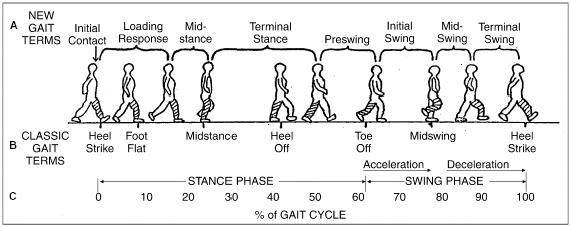

Text(0, 0.5, 'Angle (deg)')

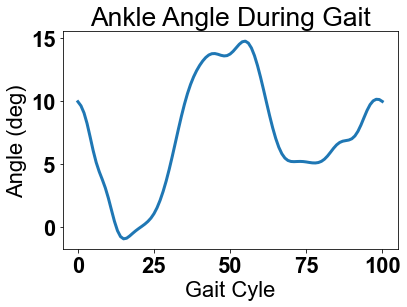

In [118]:
#we can use Matplotlib to visualize the data 
plt.plot(gaitData['PercGcycle'], gaitData['RankleAngY25'],lw=3)
plt.title('Ankle Angle During Gait')
plt.xlabel('Gait Cyle')
plt.ylabel('Angle (deg)')

Text(0, 0.5, 'Angle (deg)')

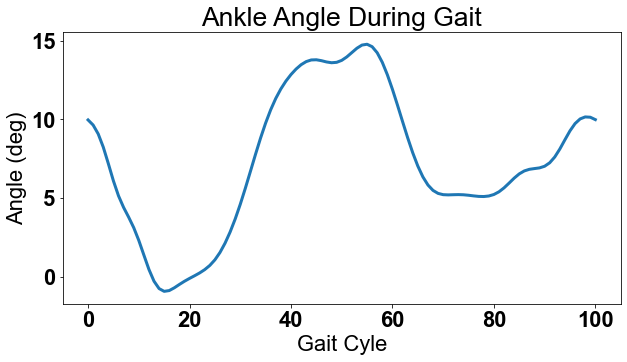

In [124]:
#we can use Matplotlib to visualize the data 
plt.figure(figsize=(10,5))
plt.plot(gaitData['PercGcycle'], gaitData['RankleAngY25'],lw=3)
plt.title('Ankle Angle During Gait')
plt.xlabel('Gait Cyle')
plt.ylabel('Angle (deg)')

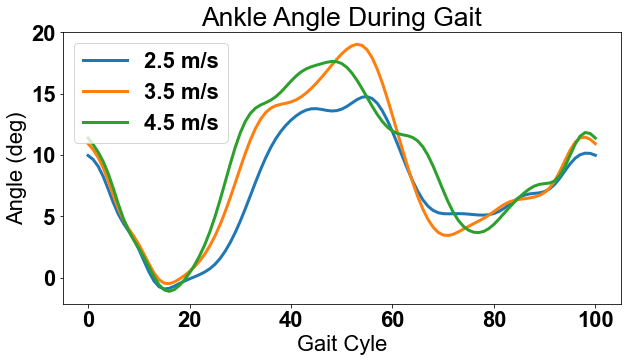

In [128]:
plt.figure(figsize=(10,5))
plt.plot(gaitData['PercGcycle'], gaitData['RankleAngY25'],lw=3,label='2.5 m/s')
plt.plot(gaitData['PercGcycle'], gaitData['RankleAngY35'],lw=3,label='3.5 m/s')
plt.plot(gaitData['PercGcycle'], gaitData['RankleAngY45'],lw=3,label='4.5 m/s')
plt.title('Ankle Angle During Gait')
plt.xlabel('Gait Cyle')
plt.ylabel('Angle (deg)')
plt.legend()

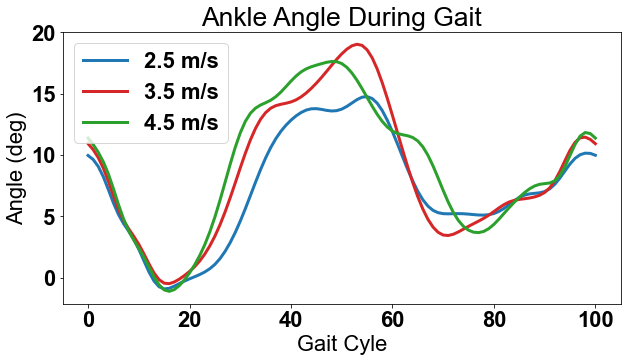

In [130]:
plt.figure(figsize=(10,5))
plt.plot(gaitData['PercGcycle'], gaitData['RankleAngY25'],lw=3,label='2.5 m/s', color='tab:blue')
plt.plot(gaitData['PercGcycle'], gaitData['RankleAngY35'],lw=3,label='3.5 m/s', color='tab:red')
plt.plot(gaitData['PercGcycle'], gaitData['RankleAngY45'],lw=3,label='4.5 m/s', color='tab:green')
plt.title('Ankle Angle During Gait')
plt.xlabel('Gait Cyle')
plt.ylabel('Angle (deg)')
plt.legend()

Text(0.5, 0, 'Gait Cycle')

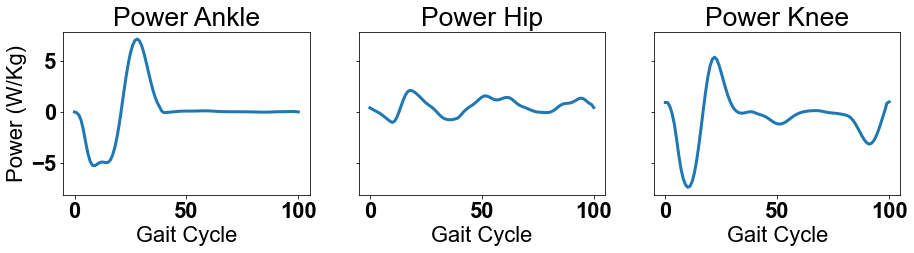

In [140]:
fig,ax = plt.subplots(1,3, figsize=(15,3), sharey = True) # number of rows , numbers of columns
ax[0].plot(gaitData['PercGcycle'], gaitData['RanklePow25'],lw=3,label='2.5 m/s')
ax[0].set_title('Power Ankle')
ax[0].set_xlabel('Gait Cycle')
ax[0].set_ylabel('Power (W/Kg)')
ax[1].plot(gaitData['PercGcycle'], gaitData['RhipPow25'],lw=3,label='2.5 m/s')
ax[1].set_title('Power Hip')
ax[1].set_xlabel('Gait Cycle')
ax[2].plot(gaitData['PercGcycle'], gaitData['RkneePow25'],lw=3,label='2.5 m/s')
ax[2].set_title('Power Knee')
ax[2].set_xlabel('Gait Cycle')

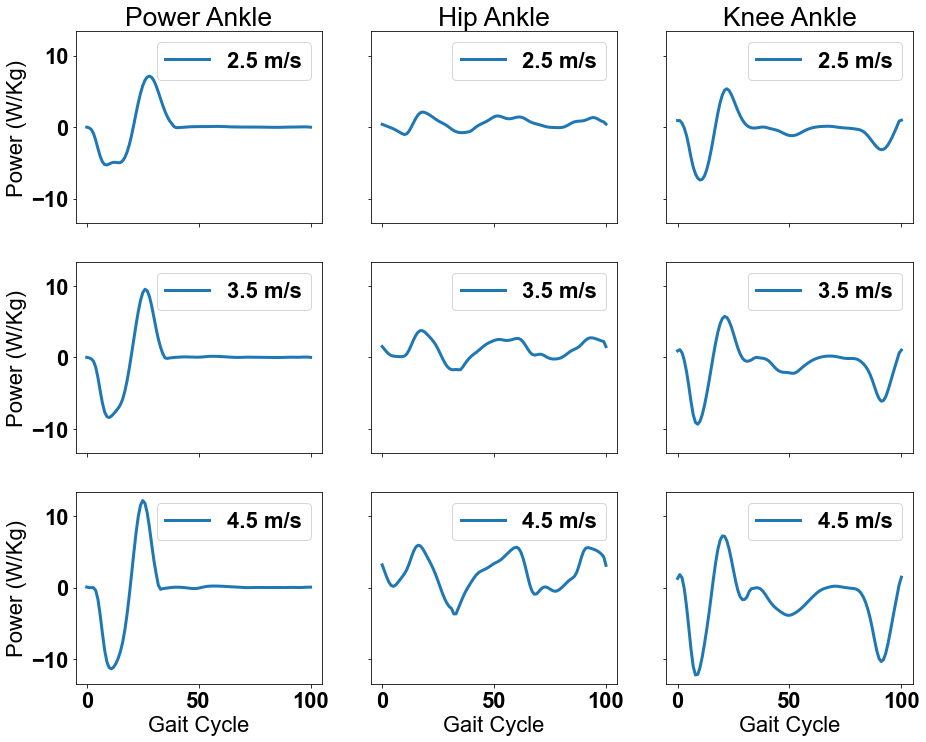

In [150]:
fig,ax = plt.subplots(3,3, figsize=(15,12), sharey = True, sharex = True) # number of rows , numbers of columns
names = ['25','35','45']
velocities = ['2.5 m/s', '3.5 m/s', '4.5 m/s']
for row in range(3):
    ax[row,0].plot(gaitData['PercGcycle'], gaitData['RanklePow'+names[row]],lw=3, label= velocities[row])
    ax[row,0].set_ylabel('Power (W/Kg)')
    ax[row,0].legend()
    ax[row,1].plot(gaitData['PercGcycle'], gaitData['RhipPow'+names[row]],lw=3, label= velocities[row])
    ax[row,1].legend()
    ax[row,2].plot(gaitData['PercGcycle'], gaitData['RkneePow'+names[row]],lw=3, label= velocities[row])
    ax[row,2].legend()
    if row == 0 :
        ax[row,0].set_title('Power Ankle')
        ax[row,1].set_title('Hip Ankle')
        ax[row,2].set_title('Knee Ankle')
    if row == 2:
        ax[row,0].set_xlabel('Gait Cycle')
        ax[row,1].set_xlabel('Gait Cycle')
        ax[row,2].set_xlabel('Gait Cycle')

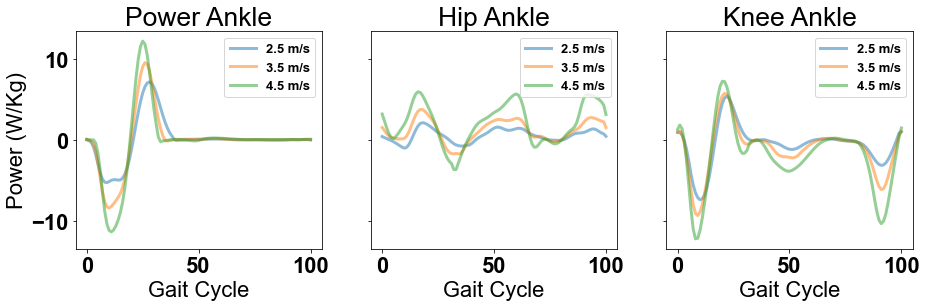

In [165]:
fig,ax = plt.subplots(1,3, figsize=(15,4), sharey = True, sharex = True) # number of rows , numbers of columns
names = ['25','35','45']
velocities = ['2.5 m/s', '3.5 m/s', '4.5 m/s']
for row in range(3):
    ax[0].plot(gaitData['PercGcycle'], gaitData['RanklePow'+names[row]],lw=3, label= velocities[row], alpha = 0.5)
    ax[0].set_ylabel('Power (W/Kg)')
    ax[0].legend(loc='upper right',fontsize = 13)
    ax[1].plot(gaitData['PercGcycle'], gaitData['RhipPow'+names[row]],lw=3, label= velocities[row], alpha = 0.5)
    ax[1].legend(loc='upper right',fontsize = 13)
    ax[2].plot(gaitData['PercGcycle'], gaitData['RkneePow'+names[row]],lw=3, label= velocities[row], alpha = 0.5)
    ax[2].legend(loc='upper right',fontsize = 13)
    if row == 0 :
        ax[0].set_title('Power Ankle')
        ax[1].set_title('Hip Ankle')
        ax[2].set_title('Knee Ankle')
    if row == 2:
        ax[0].set_xlabel('Gait Cycle')
        ax[1].set_xlabel('Gait Cycle')
        ax[2].set_xlabel('Gait Cycle')

In [175]:
#what if I want to visualize data from all subjects

def returnNumber(number):
    if number<10:
        return '00'+str(number)
    else:
        return '0'+str(number)

nSubjects = 28

ankleAngleY25 = pd.DataFrame()

for i in range(1,nSubjects+1):
    subject = 'RBDS'+returnNumber(i)
    fileName = './gaitData/'+subject+'processed.txt'
    subjectData = pd.read_csv(fileName, sep='	')
    ankleAngleY25[subject] = subjectData['RankleAngY25']

        
ankleAngleY25

,RBDS001,RBDS002,RBDS003,RBDS004,RBDS005,RBDS006,RBDS007,RBDS008,RBDS009,RBDS010,...,RBDS019,RBDS020,RBDS021,RBDS022,RBDS023,RBDS024,RBDS025,RBDS026,RBDS027,RBDS028
0,9.95580,12.68590,7.71224,15.7763,7.63076,11.46890,10.15830,11.4772,11.84430,3.78261,...,7.15781,10.82090,8.55416,9.08609,16.5480,16.3488,18.3080,10.52710,15.1537,15.4069
1,9.63101,11.97570,7.71787,14.8915,7.66341,11.37910,9.56833,11.8744,11.38080,3.61523,...,6.84092,10.39340,8.54783,8.83846,16.1920,16.2072,17.5131,9.77866,14.5939,15.2939
2,9.06687,11.10810,7.53041,13.7586,7.77255,11.18700,8.74008,12.1507,10.55160,3.24328,...,6.16872,9.96788,8.44688,8.40404,15.7586,15.8164,16.6489,8.87318,13.8245,14.8725
3,8.22768,10.04120,6.95152,12.3609,7.82098,10.73550,7.64609,12.2576,9.35976,2.67832,...,5.29091,9.47877,8.22010,7.78392,15.2024,14.9751,15.7008,7.80935,12.8422,14.1022
4,7.17670,8.81459,5.89697,10.7335,7.66619,9.92446,6.30558,12.1894,7.88454,1.94906,...,4.43113,8.88268,7.82813,6.98063,14.5314,13.5904,14.6345,6.66136,11.7197,12.9688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9.72307,14.70730,9.06377,16.7162,8.69246,12.97960,10.32690,10.0548,10.95730,3.17095,...,6.11923,12.58630,8.28706,7.86461,17.5428,17.2477,19.4327,12.18990,15.7944,13.8993
97,10.01980,14.32800,8.40380,16.9375,8.40815,12.41840,10.62710,10.2970,11.46640,3.36040,...,6.37728,12.26610,8.30593,8.51598,17.4596,17.0209,19.5972,12.09950,15.8988,14.4556
98,10.14670,13.83810,7.92882,16.8351,8.06456,11.94680,10.68230,10.6248,11.84700,3.59009,...,6.74570,11.79840,8.39450,8.94906,17.2086,16.7253,19.4192,11.74300,15.7719,14.9287
99,10.12820,13.28610,7.70131,16.4386,7.78794,11.64170,10.51130,11.0323,12.00260,3.75946,...,7.04949,11.28690,8.49637,9.13407,16.8853,16.5117,18.9436,11.21750,15.4878,15.2682


In [179]:
movement_Stats = ankleAngleY25.transpose().describe()
movement_Stats

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,12.097231,11.806199,11.324417,10.588160,9.589394,8.404307,7.175254,6.045868,5.097832,4.337476,...,10.581741,11.148377,11.638285,12.015496,12.264961,12.392876,12.420871,12.374933,12.270219,12.095347
std,3.608611,3.531939,3.478199,3.425781,3.362385,3.305948,3.290072,3.326464,3.399497,3.493173,...,3.258585,3.428136,3.628124,3.811614,3.934459,3.972734,3.930266,3.832858,3.715597,3.610341
min,3.782610,3.615230,3.243280,2.678320,1.949060,1.106350,0.223568,-0.625373,-1.388210,-2.037670,...,3.798810,3.666260,3.427470,3.207230,3.108430,3.170950,3.360400,3.590090,3.759460,3.785870
25%,9.992400,9.615340,8.839905,8.120320,7.469560,6.067085,4.911212,3.879065,3.655590,2.944503,...,8.783223,9.106043,9.264705,9.503700,9.726675,9.656422,9.884940,10.024997,10.078875,9.973612
50%,11.473050,11.379950,10.829850,9.759985,8.848635,7.971130,6.736170,5.855840,4.637845,4.163175,...,10.543300,10.884600,11.298550,11.917500,12.304550,12.388100,12.182800,11.822700,11.822150,11.481850
75%,15.285850,14.668300,13.919825,13.383925,12.339225,11.590175,9.642537,8.123815,6.775775,6.200045,...,13.084275,14.269000,14.690400,15.191750,15.458375,15.617625,15.850350,15.852350,15.583450,15.297725
max,18.308000,17.513100,16.666400,15.708200,14.944800,14.041700,13.124300,12.538600,12.085000,11.773900,...,15.600700,16.440000,17.346700,18.219400,18.948500,19.432700,19.597200,19.419200,18.943600,18.265100


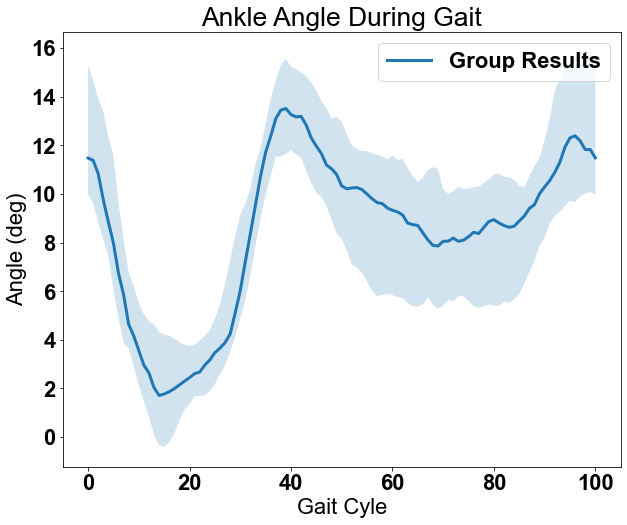

In [197]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(101), movement_Stats.iloc[5],lw = 3, label='Group Results')
plt.fill_between(range(101), movement_Stats.iloc[4], movement_Stats.iloc[6], alpha = 0.2)
plt.title('Ankle Angle During Gait')
plt.xlabel('Gait Cyle')
plt.ylabel('Angle (deg)')
plt.legend()

In [198]:
fig.savefig('myplot.png', dpi=300)

In [199]:
#comparing results from all subjects
def returnNumber(number):
    if number<10:
        return '00'+str(number)
    else:
        return '0'+str(number)

nSubjects = 28

maxAnklePower25 = []
maxAnklePower35 = []
maxAnklePower45 = []

for i in range(1,nSubjects+1):
    subject = 'RBDS'+returnNumber(i)
    fileName = './gaitData/'+subject+'processed.txt'
    subjectData = pd.read_csv(fileName, sep='	')
    maxAnklePower25.append(subjectData['RanklePow25'].max())
    maxAnklePower35.append(subjectData['RanklePow35'].max())
    maxAnklePower45.append(subjectData['RanklePow45'].max())
    


Text(0, 0.5, 'Max Power')

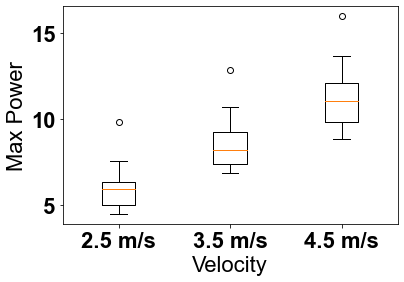

In [216]:
plt.boxplot([maxAnklePower25,maxAnklePower35,maxAnklePower45]);
plt.xticks([1,2,3],['2.5 m/s', '3.5 m/s', '4.5 m/s'])
plt.xlabel('Velocity')
plt.ylabel('Max Power')